<a href="https://colab.research.google.com/github/VIKRANT-KUMAR-MALL/loan-emi/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install jupyterthemes

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data/Loan-emi/train.csv')
data2=pd.read_csv('/content/drive/MyDrive/Data/Loan-emi/test.csv')

In [ ]:
df_date = data.groupby(by='age_in_days').mean()
df_date

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
age_in_days,,,,,,,,,,
7670,42700.333333,0.642333,77096.666667,0.000000,0.000000,0.000000,99.8450,3.333333,4700.000000,1.000000
7671,43440.333333,0.560333,42106.666667,0.000000,0.000000,0.000000,99.8100,3.000000,3400.000000,0.666667
7672,71447.428571,0.691429,45677.142857,0.500000,0.333333,0.166667,99.6950,3.857143,4371.428571,0.857143
7673,71750.333333,1.000000,40633.333333,0.000000,0.000000,0.000000,NaN,3.000000,3400.000000,1.000000
7674,57383.166667,0.691500,38771.666667,0.166667,0.000000,0.000000,99.6625,3.166667,3400.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
36870,48348.000000,0.026000,50050.000000,0.000000,0.000000,0.000000,99.8700,7.000000,5700.000000,1.000000
36874,44175.000000,0.003000,86570.000000,2.000000,0.000000,0.000000,NaN,8.000000,7500.000000,0.000000
37239,67942.000000,0.110000,102580.000000,0.000000,0.000000,0.000000,99.2700,9.000000,7500.000000,1.000000


In [ ]:
#data.hist(bins=30, figsize=(20,20), color = 'r')
#sns.pairplot(data)


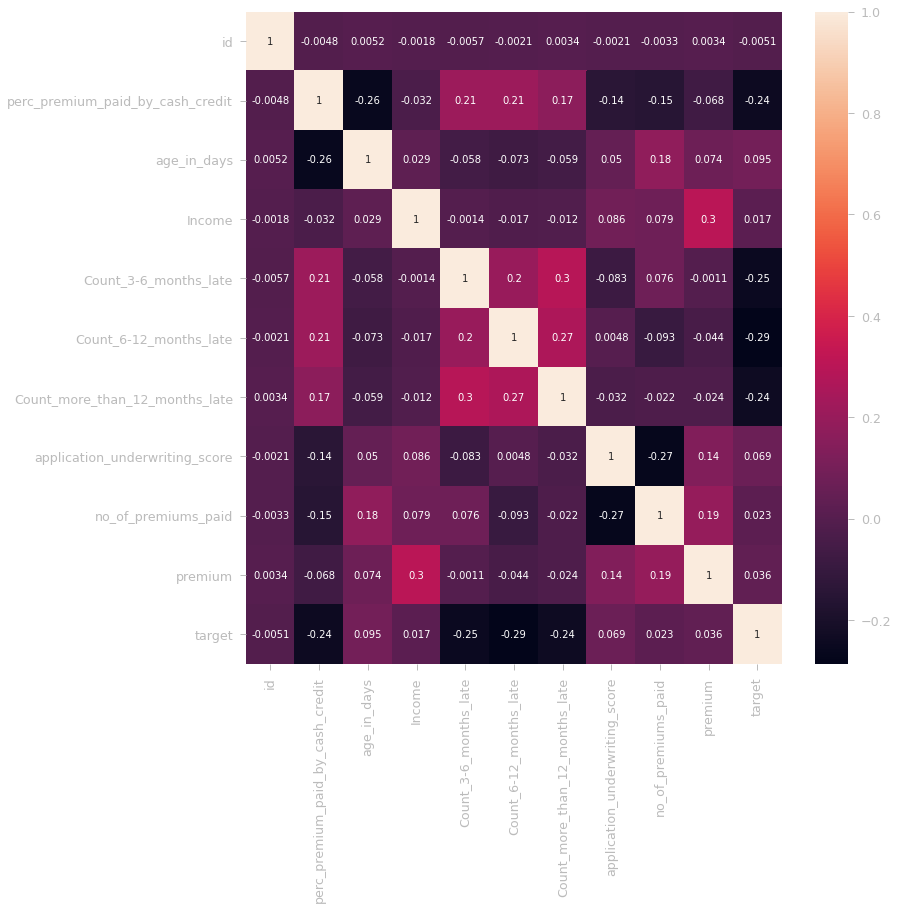

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
data=data.fillna(method='ffill')
X=data[['perc_premium_paid_by_cash_credit','age_in_days','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','application_underwriting_score','no_of_premiums_paid','sourcing_channel','residence_area_type']].values
y=data['target'].values
y=y.reshape(-1,1)
print(X.shape)
data2=data2.fillna(method='ffill')

(79853, 9)


In [ ]:
from sklearn import preprocessing
sou_cha = preprocessing.LabelEncoder()

In [ ]:
X[:,7] = sou_cha.fit_transform(X[:,7]) 
res_are = preprocessing.LabelEncoder()
X[:,8] = res_are.fit_transform(X[:,8]) 

In [ ]:
from sklearn import preprocessing
sou_cha = preprocessing.LabelEncoder()
X1[:,7] = sou_cha.fit_transform(X1[:,7]) 
res_are = preprocessing.LabelEncoder()
X1[:,8] = res_are.fit_transform(X1[:,8]) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scale = scaler.fit_transform(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X1_scale = scaler.fit_transform(X1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale,y,test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)


In [ ]:
model = Sequential([
    Dense(250, activation='relu', input_shape=(9,)),
    Dense(100, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=2,
          validation_data=(X_val, y_val))

Epoch 1/2
1997/1997 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9364 - val_loss: 0.1803 - val_accuracy: 0.9380
Epoch 2/2
1997/1997 [==============================] - 3s 2ms/step - loss: 0.1840 - accuracy: 0.9374 - val_loss: 0.1793 - val_accuracy: 0.9389


In [ ]:
print('\033[91m'"Accuracy on training set:{:.3f}".format(model.evaluate(X_train,y_train)[1]))
print('\033[93m'"Accuracy on Validation set:{:.3f}".format(model.evaluate(X_val,y_val)[1]))
print('\033[92m'"Accuracy on test set:{:.3f}".format(model.evaluate(X_test,y_test)[1]))


1997/1997 [==============================] - 2s 1ms/step - loss: 0.1829 - accuracy: 0.9386
Accuracy on training set:0.939
250/250 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9389
Accuracy on Validation set:0.939
250/250 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9414
Accuracy on test set:0.941


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_accuracy = lr_model.score(X_test, y_test)
lr_accuracy

0.9417731029301277

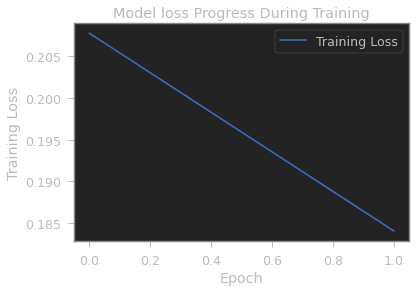

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_accuracy = dt_model.score(X_test, y_test)
dt_accuracy

0.9012021036814425

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(n_estimators=400, max_depth=10)
rf_model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_accuracy = rf_model1.score(X_test, y_test)
rf_accuracy

0.9431505133984472

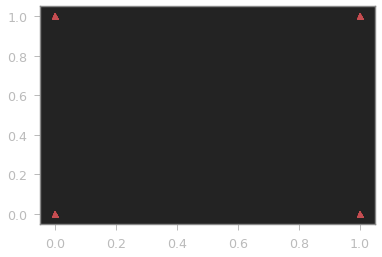

In [ ]:
y_predict = rf_model1.predict(X_test)
plt.plot(y_test, y_predict, '^' , color = 'r')

In [ ]:
#scaler = StandardScaler()
#scaler_y = scaler.fit(y)
#y_predict_orig = scaler_y.inverse_transform(y_predict)
#y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

7986

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
rsme = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
mse  = mean_squared_error(y_test, y_predict)
mae  = mean_absolute_error(y_test, y_predict)
r2   = r2_score(y_test, y_predict)
adj_r2 = 1-((1-r2)*(n-1))/(n-k-1)

In [ ]:
print('RSME =',rsme)
print('MSE =',mse)
print('MAE =',mae)
print('R2 =',r2)
print('ADJ_R2 =',adj_r2)

RSME = 0.238
MSE = 0.056849486601552715
MAE = 0.056849486601552715
R2 = -0.03670839927772129
ADJ_R2 = -0.03787820564601363


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

y_score  = model.predict_proba(X_test)[:,0]
y_score1 = lr_model.predict_proba(X_test)[:,1]
y_score2 = dt_model.predict_proba(X_test)[:,1]
y_score3 = rf_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
fpr,  tpr,  th = roc_curve(y_test, y_score)
fpr1, tpr1, th1 = roc_curve(y_test, y_score1)
fpr2, tpr2, th2 = roc_curve(y_test, y_score2)
fpr3, tpr3, th3 = roc_curve(y_test, y_score3)

print('roc_auc_score for Artificial Neural Network: ', roc_auc_score(y_test, y_score))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score3))

roc_auc_score for Logistic Regression:  0.8399466440203988
roc_auc_score for DecisionTree:  0.6025412715364721
roc_auc_score for RandomForest:  0.8537920346327774


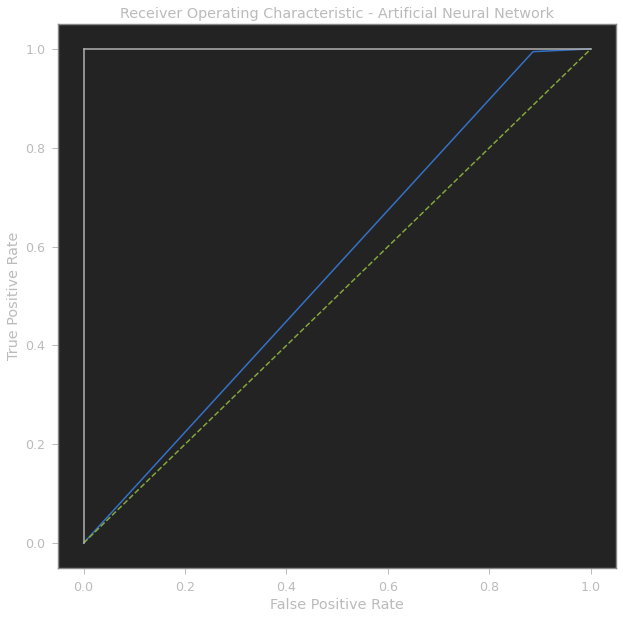

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Artificial Neural Network')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

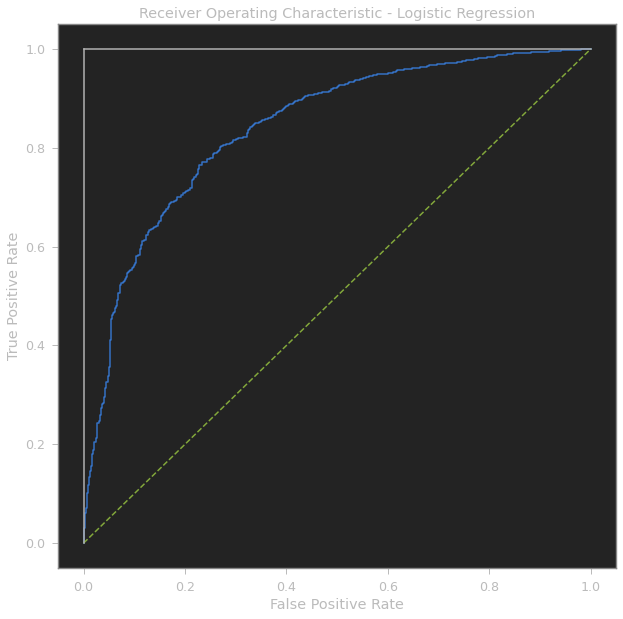

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

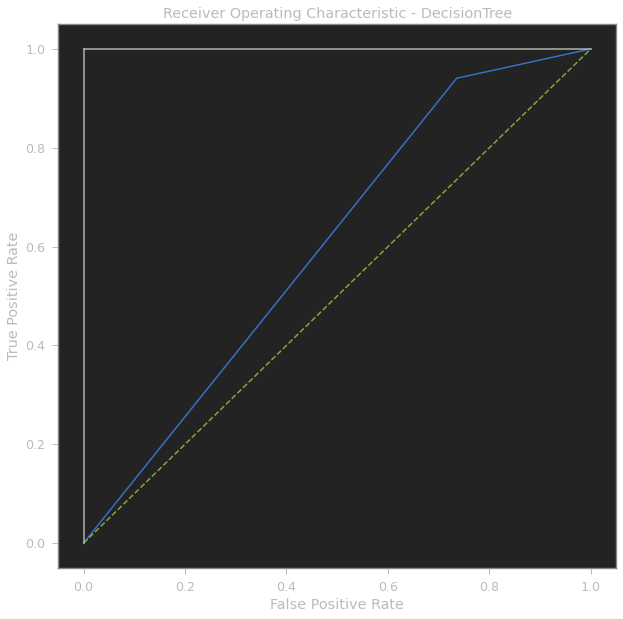

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

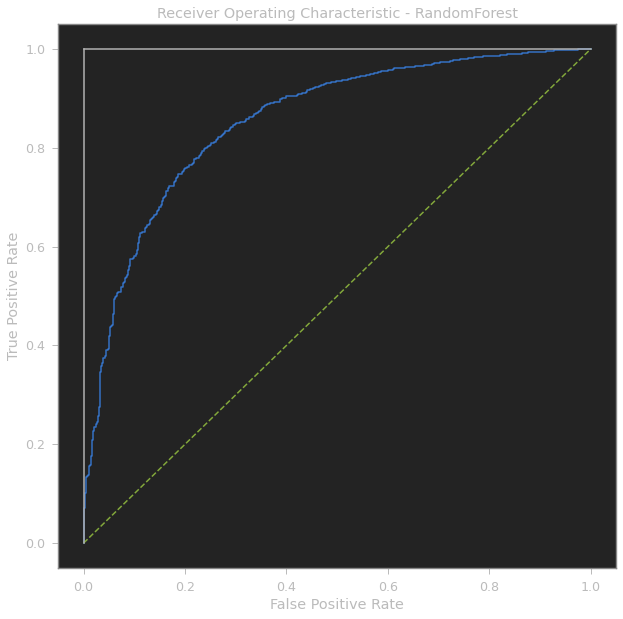

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(fpr3, tpr3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()